In [1]:
import time
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Increase graph quality
mpl.rcParams['figure.dpi']= 600
mpl.rcParams["figure.figsize"] = (12,8)

In [2]:
all_times = []

In [3]:
# vocabulary size 500 (known-data: 70%, known queries: 10)
start_times = []
with open('results/known_data/times/input-500.txt', 'r') as file:
    for line in file.readlines():
        read_time = line[1:13]
        x = time.strptime(read_time.split('.')[0], '%H:%M:%S')
        seconds = datetime.timedelta(hours=x.tm_hour, minutes=x.tm_min, seconds=x.tm_sec).total_seconds()

        start_times.append(seconds)

took_times = []
for i in range(len(start_times) - 1):
    diff = start_times[i + 1] - start_times[i]

    if diff < 0:
        diff = start_times[i + 1] + ((3600 * 24) - start_times[i])

    took_times.append(diff)

print(len(took_times), sum(took_times) / 50)

all_times.append((500, sum(took_times) / 50))

50 4986.4


In [4]:
start_times = []

with open('results/known_data/times/input.txt', 'r') as file:
    for line in file.readlines():
        read_time = line[1:13]
        x = time.strptime(read_time.split('.')[0], '%H:%M:%S')
        seconds = datetime.timedelta(hours=x.tm_hour, minutes=x.tm_min, seconds=x.tm_sec).total_seconds()

        start_times.append(seconds)

took_times = []
for i in range(len(start_times) - 1):
    diff = start_times[i + 1] - start_times[i]

    if diff < 0:
        diff = start_times[i + 1] + ((3600 * 24) - start_times[i])

    took_times.append(diff)

times = [(y, sum(took_times[x:(x + 50)]) / 50) for y, x in zip(reversed(range(100, 401, 100)), range(0, 151, 50))]

print(times)

all_times = all_times + times

[(400, 1628.6), (300, 464.14), (200, 113.44), (100, 25.08)]


In [5]:
all_times = np.array(list(reversed(all_times)))

print(all_times)

[[ 100.     25.08]
 [ 200.    113.44]
 [ 300.    464.14]
 [ 400.   1628.6 ]
 [ 500.   4986.4 ]]


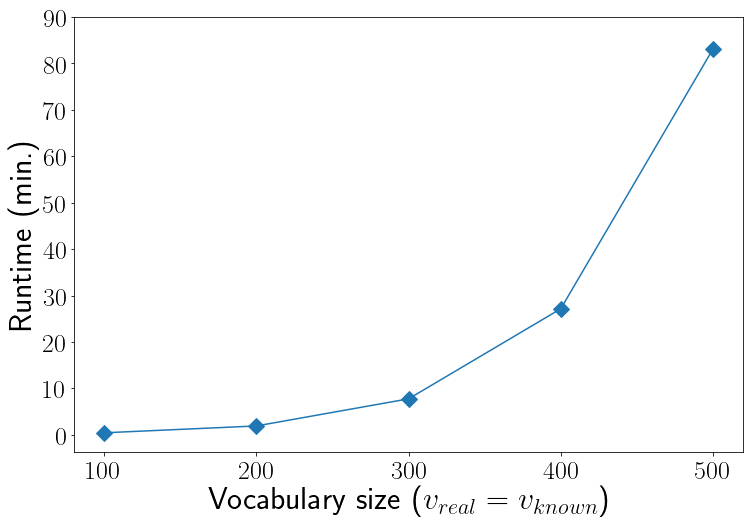

In [13]:
plt.plot(all_times[:, 0], all_times[:, 1] / 60, marker='D', markersize=12)

plt.ylabel("Runtime (min.)", fontsize=32)
plt.xlabel("Vocabulary size ($v_{real} = v_{known}$)", fontsize=32)

plt.yticks(np.arange(0, 91, step=10), fontsize=26)
plt.xticks(np.arange(100, 501, step=100), fontsize=26)
# plt.ylim(top=1.05, bottom=0.35)

# plt.legend(loc='lower right', fontsize=32)

# plt.yticks(np.arange(0, 1.1, step=0.1))
# plt.xticks(fontsize=26)

# plt.ylim(top=1.01, bottom=0.0)
# plt.xlim(left=0.0, right=0.825)
mpl.rc('text', usetex = True)
mpl.rcParams["figure.figsize"] = (12,8)

plt.savefig('ckws-adapted-runtime-2-kw.eps', format='eps')


plt.show()

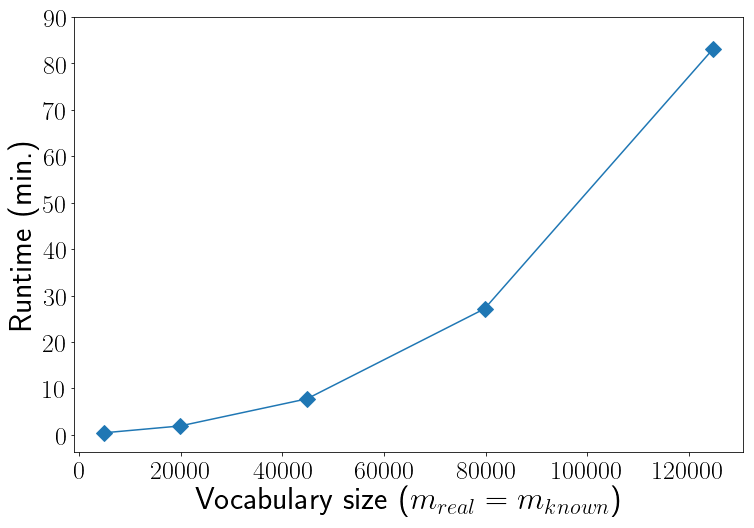

In [7]:
plt.plot([x*(x+1)/2-x for x in all_times[:, 0]], all_times[:, 1] / 60, marker='D', markersize=12)

plt.ylabel("Runtime (min.)", fontsize=32)
plt.xlabel("Vocabulary size ($m_{real} = m_{known}$)", fontsize=32)

plt.yticks(np.arange(0, 91, step=10), fontsize=26)
plt.xticks(fontsize=26)
# plt.ylim(top=1.05, bottom=0.35)

# plt.legend(loc='lower right', fontsize=32)

# plt.yticks(np.arange(0, 1.1, step=0.1))
# plt.xticks(fontsize=26)

# plt.ylim(top=1.01, bottom=0.0)
# plt.xlim(left=0.0, right=0.825)
mpl.rc('text', usetex = True)
mpl.rcParams["figure.figsize"] = (12,8)

plt.savefig('ckws-adapted-runtime-2-kw-keyword-conjunctions.eps', format='eps')


plt.show()

In [8]:

ratios = []
for x, y in all_times:
    ratios.append(y/x)

diffs = []
for i in range(len(all_times) - 1):
    diffs.append(all_times[i + 1][1]/all_times[i][1])
    print(all_times[i + 1][1]/all_times[i][1])

# second difference
for i in range(len(diffs) - 1):
    print(diffs[i + 1] - diffs[i])

print("---")

for i in range(len(ratios) - 1):
    print(ratios[i + 1]/ratios[i])

4.523125996810208
4.091502115655853
3.5088550868272503
3.0617708461255067
-0.4316238811543549
-0.5826470288286028
-0.4470842407017437
---
2.261562998405104
2.727668077103902
2.6316413151204374
2.4494166769004053


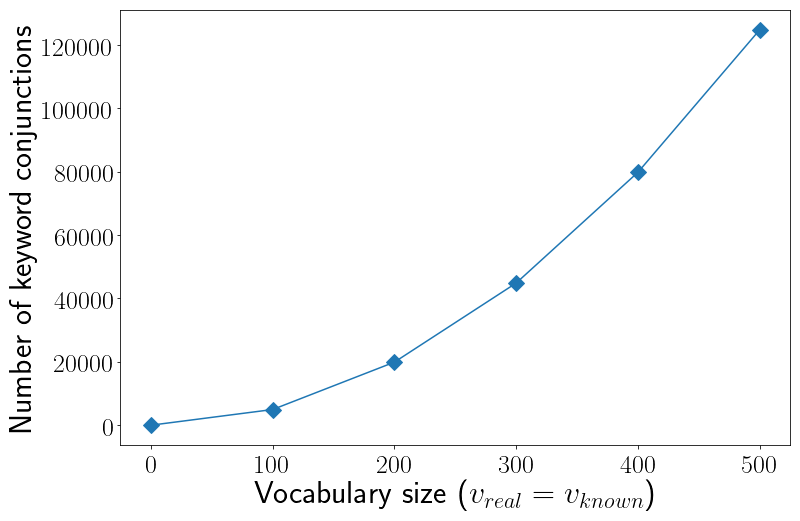

In [9]:
plt.plot(range(0, 501, 100), [x*(x+1)/2-x for x in range(0, 501, 100)], marker='D', markersize=12)

plt.ylabel("Number of keyword conjunctions", fontsize=32)
plt.xlabel("Vocabulary size ($v_{real} = v_{known}$)", fontsize=32)

plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
# plt.ylim(top=1.05, bottom=0.35)

# plt.legend(loc='lower right', fontsize=32)

# plt.yticks(np.arange(0, 1.1, step=0.1))
# plt.xticks(fontsize=26)

# plt.ylim(top=1.01, bottom=0.0)
# plt.xlim(left=0.0, right=0.825)
mpl.rc('text', usetex = True)
mpl.rcParams["figure.figsize"] = (12,8)

plt.savefig('ckws-adapted-runtime-nb-of-keyword-conjunctions.eps', format='eps')


plt.show()

In [10]:
kw_cjs = [x*(x+1)/2-x for x in range(100, 1001, 100)]


diffs = []
for i in range(len(kw_cjs) - 1):
    diff = kw_cjs[i + 1] - kw_cjs[i]
    diffs.append(diff)
    print(f"{kw_cjs[i + 1]}/{kw_cjs[i]} = {kw_cjs[i + 1]/kw_cjs[i]}")
    
second_diffs = []
for i in range(len(diffs) - 1):
    second_diff = diffs[i + 1] - diffs[i]
    second_diffs.append(second_diff)
    print(second_diff)

19900.0/4950.0 = 4.02020202020202
44850.0/19900.0 = 2.2537688442211055
79800.0/44850.0 = 1.7792642140468227
124750.0/79800.0 = 1.56328320802005
179700.0/124750.0 = 1.4404809619238477
244650.0/179700.0 = 1.3614357262103507
319600.0/244650.0 = 1.3063560188023708
404550.0/319600.0 = 1.2658010012515644
499500.0/404550.0 = 1.2347052280311457
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0


In [11]:
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

kw_cjs_per_comb = [ncr(200, x) for x in range(1, 11)]

diffs = []
for i in range(len(kw_cjs_per_comb) - 1):
    diff = kw_cjs_per_comb[i + 1] - kw_cjs_per_comb[i]
    diffs.append(diff)
    print(diff)
    
    print(f"ratio: {kw_cjs_per_comb[i + 1] / kw_cjs_per_comb[i]}")

print("---")    
second_diffs = []
for i in range(len(diffs) - 1):
    second_diff = diffs[i + 1] - diffs[i]
    second_diffs.append(second_diff)
    print(second_diff)
    
print("---")
third_diffs = []
for i in range(len(second_diffs) - 1):
    third_diff = second_diffs[i + 1] - second_diffs[i]
    third_diffs.append(third_diff)
    print(third_diff)
    

19700
ratio: 99.5
1293500
ratio: 66.0
63371550
ratio: 49.25
2470965090
ratio: 39.2
79872976260
ratio: 32.5
2201487588300
ratio: 27.714285714285715
52815099962625
ratio: 24.125
1120346255603575
ratio: 21.333333333333332
21275559057232480
ratio: 19.1
---
1273800
62078050
2407593540
77402011170
2121614612040
50613612374325
1067531155640950
20155212801628905
---
60804250
2345515490
74994417630
2044212600870
48491997762285
1016917543266625
19087681645987955


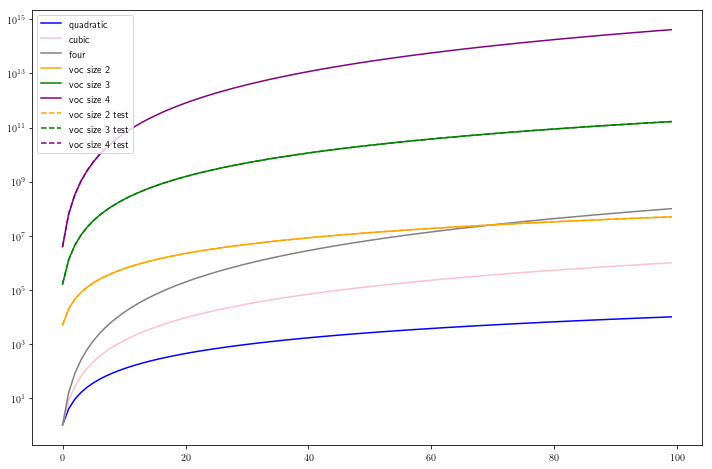

In [12]:
quadratic = [x**2 for x in range(1, 101)]
cubic = [x**3 for x in range(1, 101)]
four = [x**4 for x in range(1, 101)]
five = [x**5 for x in range(1, 101)]
combinatorial = [ncr(10000, x) for x in range(1, 11)]
exponential = [2**x for x in range(1, 101)]
increasing_voc_size_2 = [ncr(x, 2) for x in range(100, 10001, 100)]
increasing_voc_size_3 = [ncr(x, 3) for x in range(100, 10001, 100)]
increasing_voc_size_4 = [ncr(x, 4) for x in range(100, 10001, 100)]


increasing_voc_size_2_test = [x*(x-1)/2 for x in range(100, 10001, 100)]
increasing_voc_size_3_test = [x*(x-1)*(x-2)/6 for x in range(100, 10001, 100)]
increasing_voc_size_4_test = [x*(x-1)*(x-2)*(x-3)/24 for x in range(100, 1001, 100)]

plt.plot(quadratic, label='quadratic', color='blue')
plt.plot(cubic, label='cubic', color='pink')
plt.plot(four, label='four', color='gray')
# plt.plot(five, label='five')
# plt.plot(combinatorial, label='combinatorial', color='black')
# plt.plot(exponential, label='exponential', color='yellow')
plt.plot(increasing_voc_size_2, label='voc size 2', color='orange')
plt.plot(increasing_voc_size_3, label='voc size 3', color='green')
plt.plot(increasing_voc_size_4, label='voc size 4', color='purple')

plt.plot(increasing_voc_size_2_test, label='voc size 2 test', color='orange', linestyle='--')
plt.plot(increasing_voc_size_3_test, label='voc size 3 test', color='green', linestyle='--')
plt.plot(increasing_voc_size_4_test, label='voc size 4 test', color='purple', linestyle='--')

plt.yscale('log')
plt.legend()

plt.show()